## 실습 평가 과제



#### 과제 1.
아래 가이드에 따라서 1000명의 고객 구매데이터를 생성하고 아래사항을 수행하세요(관측치 10000개)

Q1. 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.

고객별 속성 데이터
- id : 1 ~ 1000 고객 번호
- gender : 0,1 정수 난수 생성
- age : 0 ~ 80사이 정수 난수 생성
- region : 1 ~ 10 사이 정수 난수 생성

거래 데이터
- no : 1 ~ 10000번 일련번호
- day : 요일
- date : 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성
- product_20 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- product_21 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- price_20 : 1000 ~ 50000 사이 실수 난수 생성
- price_21 : 1000 ~ 50000 사이 실수 난수 생성
- quantity_20 : 1 ~ 100 사이 정수 난수 생성
- quantity_21 : 1 ~ 100 사이 정수 난수 생성
- time_20 : 01 ~ 24 사이 정수 난수 생성
- time_21 : 01 ~ 24 사이 정수 난수 생성
- amount_20 : price_20 * quantity_21
- amount_21 : price_21 * quantity_21

Q2. df를 수정하여 3가지 이상의 인사이트를 포함한 데이터셋으로 변환 후 데이터셋을 data_gen.csv 파일 로 저장하세요.




#### 과제2
data_gen.csv 파일을 불러와서 데이터셋에 대한 통계적 탐색을 수행하고 아래 예시를 참조하여 분석용 데이터셋으로서 가치를 제고하기 위한 수정작업을 하신 후 데이터셋이 포함하고 있는 특징 및 인사이트를 정리하여 기술하고 그 결과 파일을 data_rev.csv 이름으로 저장하세요.

(예시) 분석용 데이터셋 가치를 제고하기 위하여 통계적 분석 기법을 이용하여 데이터셋에 대하여 다음 인사이트가 반영되도록 데이터셋을 수정하세요.
- 가격, 구매 수량에 10개의 결측치 반영
- 가격, 구매 수량, 총 구매 금액 분포를 정규분포에 근사하도록 수정
- 성별에 따른 구매 구액의 분포에 이상치가 포함되지 않도록 수정

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

# 업로드된 파일을 데이터프레임으로 읽기
file_path = list(uploaded.keys())[0]
df = pd.read_csv(file_path,index_col=0)

Saving data_2.csv to data_2.csv


## 데이터셋 수정

- 가격, 구매 수량에 10개의 결측치 반영
- 평균값과 중앙값의 차이가 큰 컬럼들의 정규분포 근사하도록 수정(age,time,quantity20,amount)

## 포함하고 있는 인사이트
- 나이 범주형으로 만들어 30~50대의 구매 금액이 높게
- 코로나가 발생한 20년도 보다 21년도의 구매 금액이 높게
- 고가,중가를 구매한 나이의 평균은 50, 저가를 구매한 나이의 평균은 20~30
- 주말이 평일보다 구매하는 양이 많게
- 시간 범주형을 만들어 새벽에 구매하는 사람은 20대쯤, 밤에 구매하는 사람은 30대쯤

In [ ]:
df

,cusid,cusno,gender,age,region,date,day,product_20,product_21,price_20,...,time_21,amount_20,amount_21,total,age_cat,time_cat21,time_cat20,year,month,days
0,1.0,1.0,0.0,65.800949,9.0,2021-11-30,Tuesday,30.0,30.0,20400.45,...,1.731932,2.163600e+06,1.294042e+06,3.457642e+06,sixties,dawn,night,2021,11,30
1,1.0,1.0,0.0,52.219651,9.0,2020-02-20,Thursday,30.0,30.0,26880.21,...,7.533426,1.144750e+06,2.595819e+06,3.740569e+06,fifties,morning,afternoon,2020,2,20
2,1.0,1.0,0.0,2.402054,9.0,2021-09-11,Saturday,30.0,20.0,18764.62,...,12.020281,1.556972e+06,5.181434e+06,6.738407e+06,childhood,afternoon,dawn,2021,9,11
3,1.0,1.0,0.0,36.272611,9.0,2021-12-19,Sunday,20.0,30.0,3092.66,...,9.924405,1.614097e+06,4.247538e+06,5.861635e+06,thirties,morning,afternoon,2021,12,19
4,1.0,1.0,0.0,50.149470,9.0,2020-12-16,Wednesday,10.0,20.0,17948.80,...,9.300455,2.179819e+06,1.309205e+06,3.489024e+06,fifties,morning,afternoon,2020,12,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1000.0,1000.0,0.0,12.794764,1.0,2020-12-22,Tuesday,30.0,10.0,48659.99,...,8.093043,2.008720e+06,3.237787e+06,5.246507e+06,teenagers,morning,dawn,2020,12,22
9996,1000.0,1000.0,0.0,26.305755,1.0,2020-08-01,Saturday,20.0,10.0,31289.80,...,8.946876,1.845640e+06,1.391025e+06,3.236665e+06,twenties,morning,morning,2020,8,1
9997,1000.0,1000.0,0.0,50.723343,1.0,2021-08-03,Tuesday,20.0,10.0,15851.53,...,18.058970,2.650943e+06,3.558769e+06,6.209712e+06,fifties,evening,afternoon,2021,8,3
9998,1000.0,1000.0,0.0,64.019353,1.0,2020-06-15,Monday,20.0,20.0,44765.18,...,10.094318,2.223264e+06,1.814386e+06,4.037650e+06,sixties,morning,night,2020,6,15


In [ ]:
df.describe()

,cusid,cusno,gender,age,region,product_20,product_21,price_20,price_21,quantity_20,quantity_21,time_20,time_21,amount_20,amount_21,total,year,month,days
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9990.000000,9990.000000,9990.000000,9990.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.00000,10000.000000
mean,498.542063,498.542063,0.727263,37.097788,5.878263,20.176763,19.949763,25372.858358,25329.475170,52.094286,50.377841,12.436407,12.204389,1.824114e+06,2.483815e+06,4.307929e+06,2020.501200,6.51030,15.654000
std,290.911140,290.911140,2.897273,19.681198,3.776335,8.236794,8.233073,14230.608099,14347.991363,26.013120,28.821409,5.513240,5.622434,1.083643e+06,1.472870e+06,1.839393e+06,0.500024,3.43783,8.811972
min,1.000000,1.000000,0.000000,0.016875,1.000000,10.000000,10.000000,37.460566,37.460566,0.002699,1.000000,0.000556,0.004462,3.746057e+01,3.746057e+01,3.746057e+01,2020.000000,1.00000,1.000000
25%,248.000000,248.000000,0.000000,22.343903,3.000000,10.000000,10.000000,13006.475000,12767.970000,33.348971,25.000000,8.611896,8.193053,9.807236e+05,1.327040e+06,3.000188e+06,2020.000000,4.00000,8.000000
50%,496.000000,496.000000,1.000000,36.763223,6.000000,20.000000,20.000000,25401.950000,25353.580000,51.595318,50.000000,12.927924,12.699191,1.758405e+06,2.378994e+06,4.218888e+06,2021.000000,7.00000,16.000000
75%,752.250000,752.250000,1.000000,50.916609,8.000000,30.000000,30.000000,37709.180000,37755.987500,70.009866,76.000000,16.427945,16.276032,2.556507e+06,3.486689e+06,5.546410e+06,2021.000000,9.00000,23.000000
max,1000.000000,1000.000000,37.460566,89.878522,37.460566,37.460566,37.460566,49998.520000,49996.220000,146.796434,100.000000,23.996306,23.989696,6.622666e+06,8.629190e+06,1.143749e+07,2021.000000,12.00000,31.000000


In [ ]:
# age : 중앙값보다 평균값이 큰걸로 보아 소수의 나이가 많은 사람이 있음
# amount20,21,total : age와 같음

In [ ]:
df.isnull().sum()

cusid           0
cusno           0
gender          0
age             0
region          0
date            0
day             0
product_20      0
product_21      0
price_20       10
price_21       10
quantity_20    10
quantity_21    10
time_20         0
time_21         0
amount_20       0
amount_21       0
total           0
age_cat         0
time_cat20      0
time_cat21      0
year            0
month           0
days            0
dtype: int64

In [ ]:
data = df.copy()

In [ ]:
data.isnull().sum()

cusid          0
cusno          0
gender         0
age            0
region         0
date           0
day            0
product_20     0
product_21     0
price_20       0
price_21       0
quantity_20    0
quantity_21    0
time_20        0
time_21        0
amount_20      0
amount_21      0
total          0
age_cat        0
time_cat20     0
time_cat21     0
year           0
month          0
days           0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

# 기술 통계량 계산
desc_stats = data[['age','price_20','price_21','quantity_20', 'quantity_21','amount_20','amount_21']].describe()
desc_stats

,age,price_20,price_21,quantity_20,quantity_21,amount_20,amount_21
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,35.118448,25606.414231,25350.516231,39.435620,51.114114,1.783973e+06,2.401173e+06
std,20.625324,14194.180949,14167.728894,23.349636,28.751258,1.216556e+06,1.652625e+06
min,0.007579,1000.900000,1000.470000,0.008367,1.000000,1.052013e+02,1.081031e+02
25%,18.709704,13375.775000,13003.367500,20.839631,26.000000,8.068052e+05,1.043321e+06
50%,34.168008,25880.800000,25500.180000,37.920823,51.000000,1.608101e+06,2.156412e+06
75%,49.693551,37784.470000,37418.020000,55.480958,76.000000,2.562364e+06,3.470281e+06
max,89.914966,49996.260000,49991.950000,129.331293,100.000000,7.700481e+06,9.988362e+06


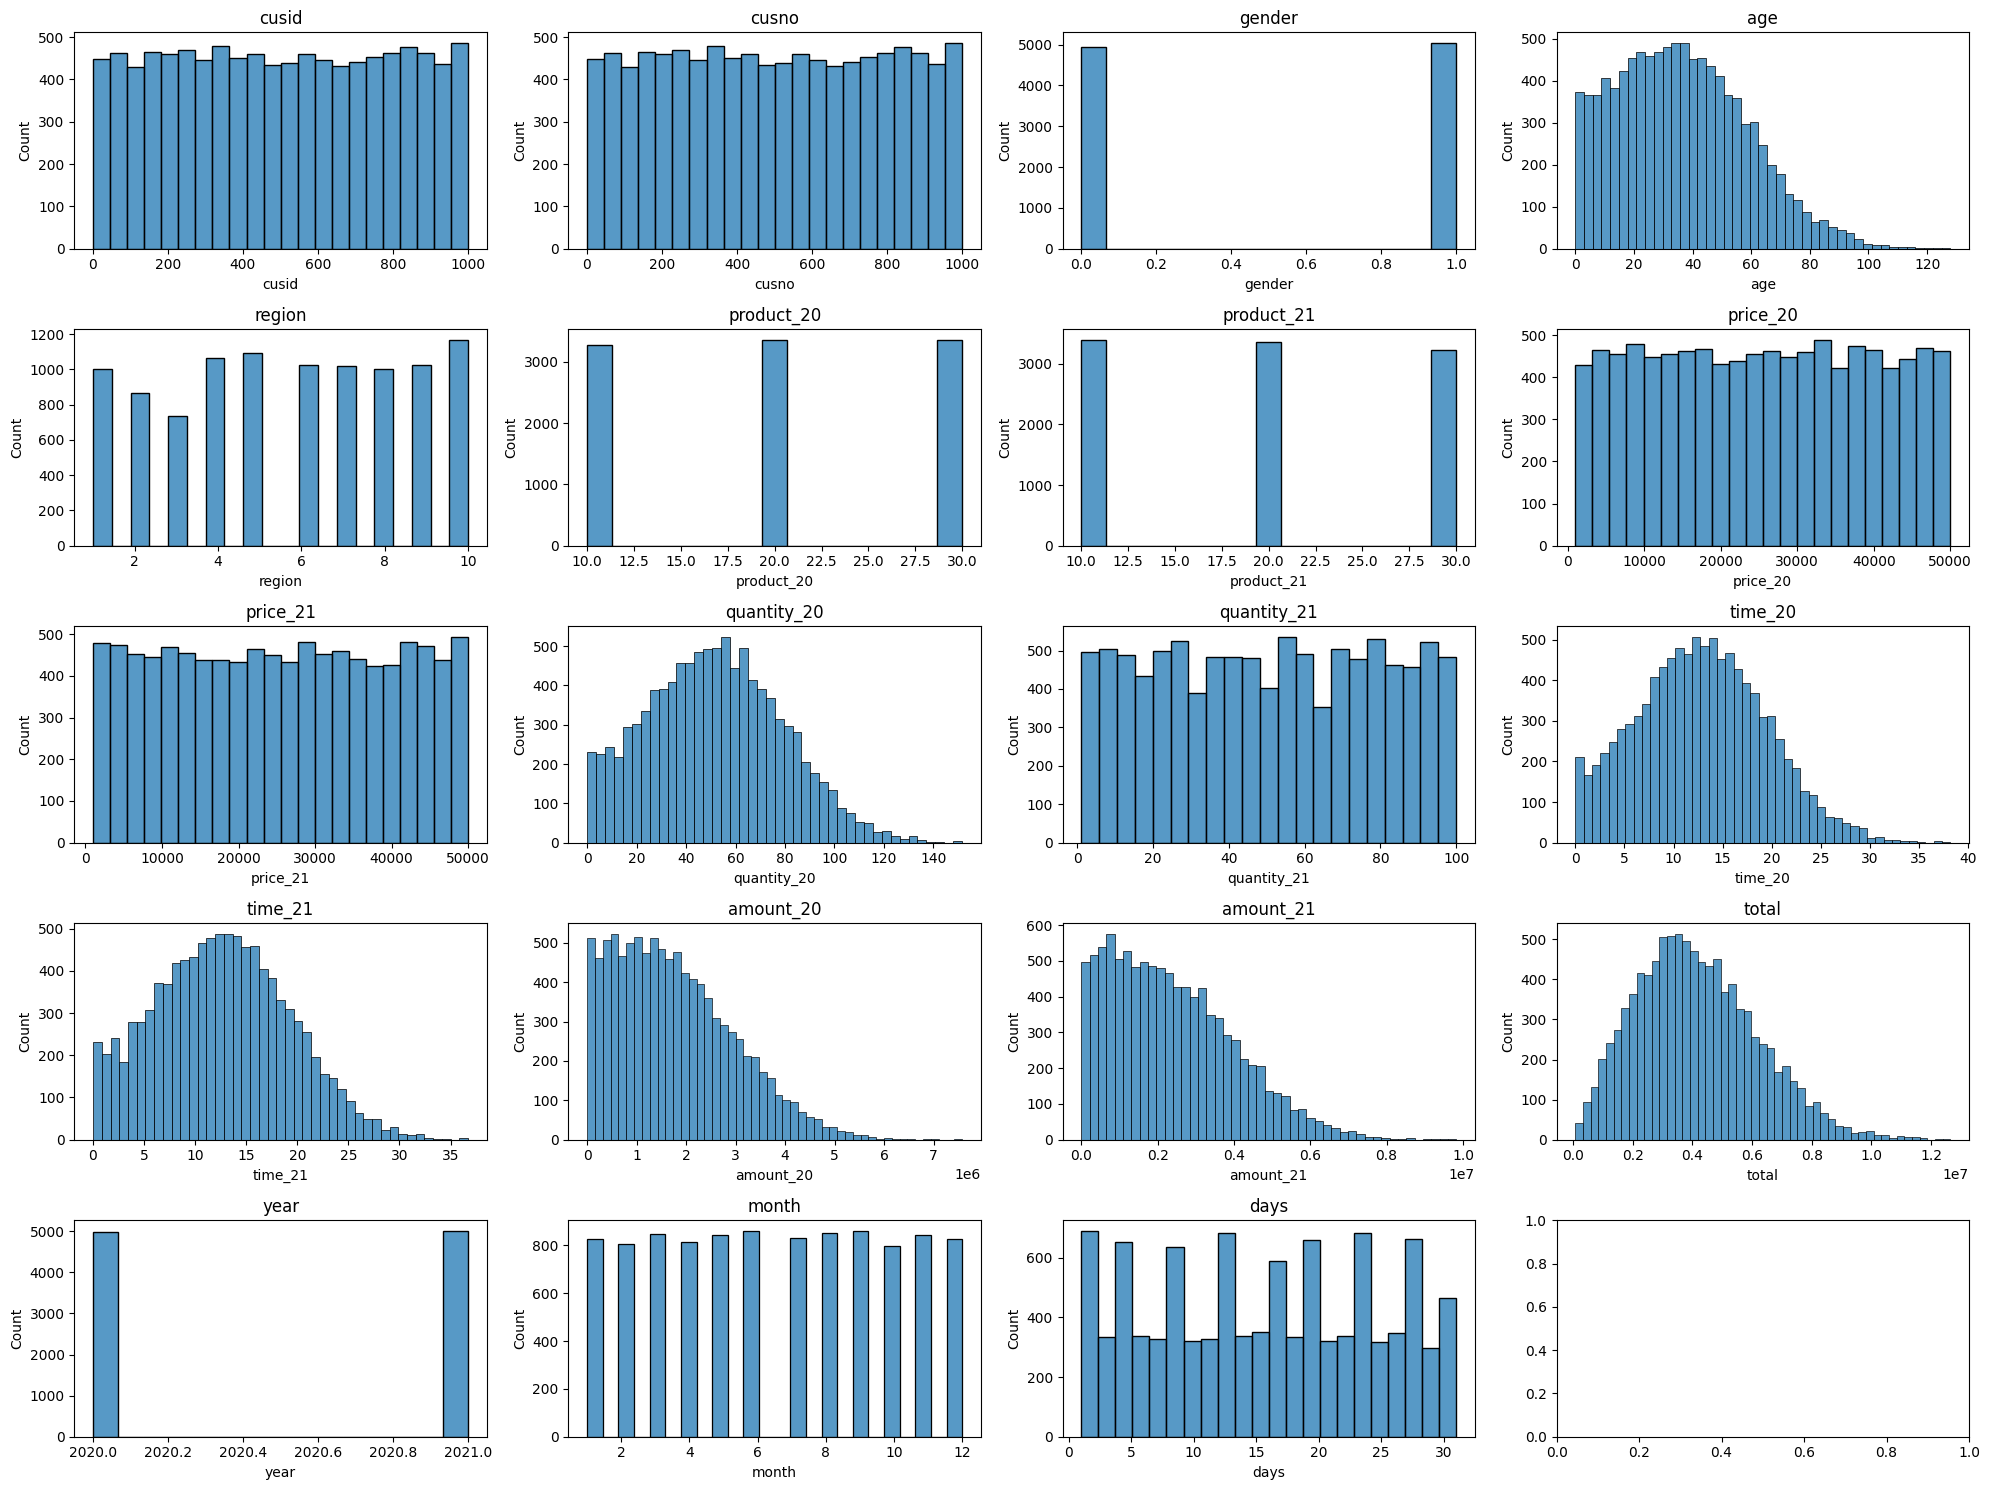

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(5, 4, figsize=(20, 15))

columns = list(data.select_dtypes(include='number').columns)

for i, column in enumerate(columns):
    row = i // 4
    col = i % 4
    sns.histplot(data[column], ax=axes[row, col])
    axes[row, col].set_title(column)

plt.tight_layout()
plt.show()

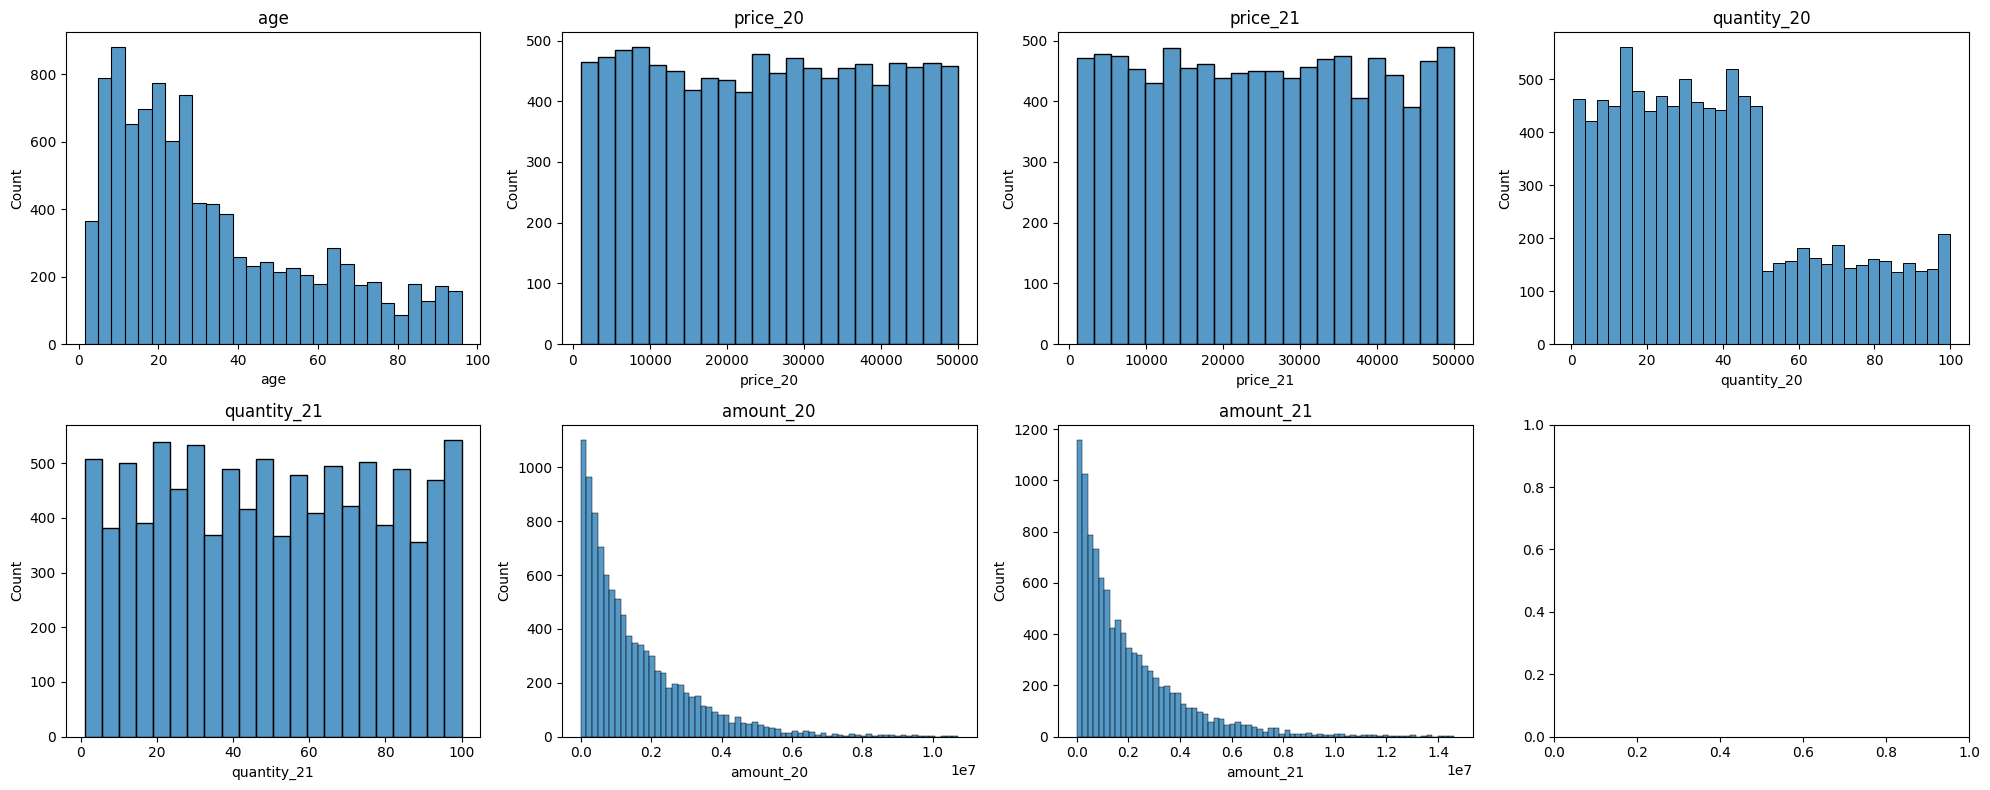

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 4, figsize=(20, 8))

columns = list(desc_stats.columns)

for i, column in enumerate(columns):
    row = i // 4
    col = i % 4
    sns.histplot(data[column], ax=axes[row, col])
    axes[row, col].set_title(column)

plt.tight_layout()
plt.show()

In [ ]:
# age, quantity_20, amount_20, amount_21 : 양의 왜곡분포
# 이 컬럼들을 정규분포에 근사하도록 수정
import pandas as pd
import numpy as np
from scipy.stats import norm

np.random.seed(10)

li = ['age','quantity_20','amount_20','amount_21']

for i in li:
    a,b = norm.fit(data[i])
    data[i] = np.random.normal(a,b,data.shape[0])
    data[i] = np.abs(data[i])

# 20년도 21년도 총 구매양 업데이트
data['total'] = data['amount_20'] + data['amount_21']

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

np.random.seed(10)

li = ['time_20','time_21']

for i in li:
    a,b = norm.fit(data[i])
    data[i] = np.random.normal(a,b,data.shape[0])
    data[i] = np.abs(data[i])

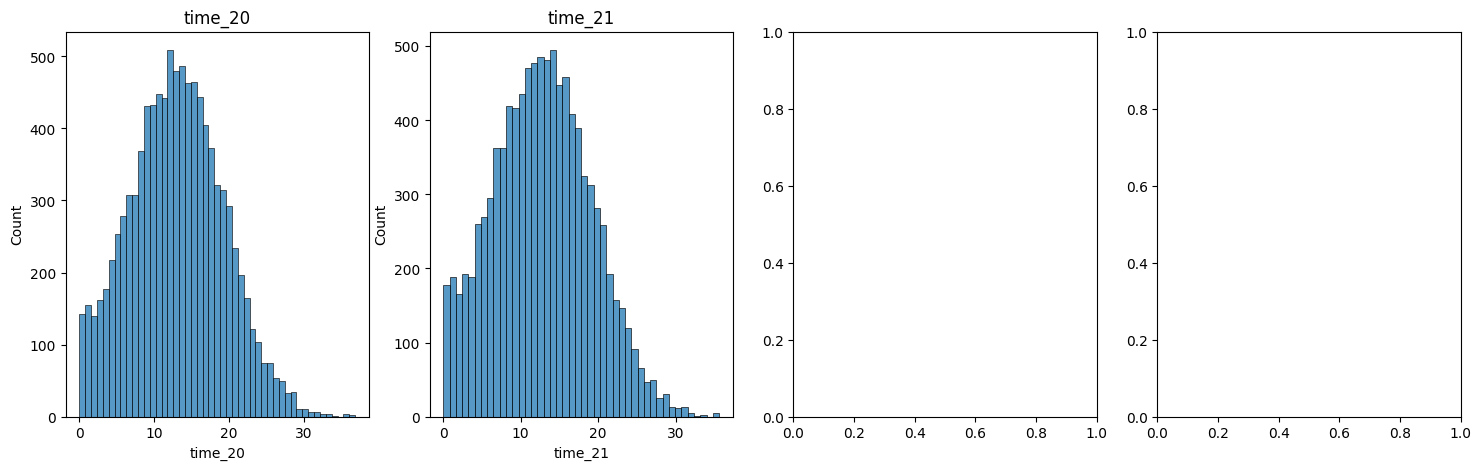

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

# 가격, 구매 수량, 총 구매 금액 분포 시각화
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
li = ['time_20','time_21']

for inx,col in enumerate(li):
    sns.histplot(data[col], ax=axes[inx])
    axes[inx].set_title(col)



plt.show()

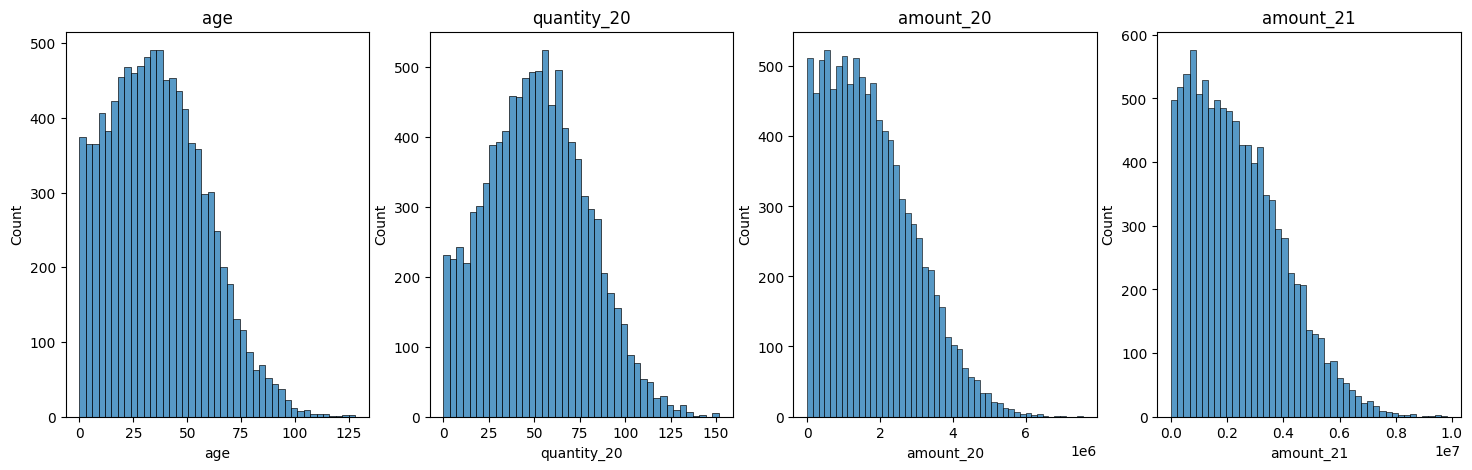

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

# 가격, 구매 수량, 총 구매 금액 분포 시각화
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
li = ['age','quantity_20','amount_20','amount_21']

for inx,col in enumerate(li):
    sns.histplot(data[col], ax=axes[inx])
    axes[inx].set_title(col)



plt.show()

In [ ]:
data.describe()
# age,quantity20, amount20,21,total 평균값과 중앙값의 차이가 별로 안나도록 수정 완료(데이터의 대칭성)

,cusid,cusno,gender,age,region,product_20,product_21,price_20,price_21,quantity_20,quantity_21,time_20,time_21,amount_20,amount_21,total,year,month,days
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.00000,10000.000000
mean,503.190600,503.190600,0.511000,36.685317,5.537700,19.938000,19.98500,25397.171533,25348.435657,40.422651,50.182500,12.519000,12.534400,1.844167e+06,2.511175e+06,4.355341e+06,2020.501200,6.51030,15.654000
std,289.819418,289.819418,0.499904,19.786896,2.850297,8.157378,8.15576,14256.035858,14217.697704,21.767874,28.892699,6.894867,6.894155,1.085861e+06,1.475470e+06,1.827459e+06,0.500024,3.43783,8.811972
min,1.000000,1.000000,0.000000,0.011276,1.000000,10.000000,10.00000,1008.850000,1002.810000,0.009925,1.000000,1.000000,1.000000,4.827317e+02,4.286932e+02,2.620633e+04,2020.000000,1.00000,1.000000
25%,250.000000,250.000000,0.000000,21.919408,3.000000,10.000000,10.00000,12764.502500,12964.430000,23.997581,25.000000,7.000000,7.000000,9.935048e+05,1.354070e+06,3.038848e+06,2020.000000,4.00000,8.000000
50%,506.000000,506.000000,1.000000,36.014625,6.000000,20.000000,20.00000,25465.490000,25298.630000,39.758715,50.000000,13.000000,13.000000,1.772310e+06,2.405199e+06,4.251237e+06,2021.000000,7.00000,16.000000
75%,756.000000,756.000000,1.000000,50.246390,8.000000,30.000000,30.00000,37845.425000,37528.475000,55.426119,75.000000,18.000000,18.000000,2.575095e+06,3.513137e+06,5.588616e+06,2021.000000,9.00000,23.000000
max,1000.000000,1000.000000,1.000000,115.176725,10.000000,30.000000,30.00000,49988.030000,49998.830000,121.117612,100.000000,24.000000,24.000000,6.674265e+06,8.689679e+06,1.151677e+07,2021.000000,12.00000,31.000000


In [ ]:
# 나이 범주 업데이트
bins = [0,10,20,30,40,50,60,70,80,90]
labels=['childhood','teenagers','twenties','thirties','forties','fifties','sixties','seventies','eighties']
# right=False 왼쪽 경계는 포함하고 오른쪽 경계는 미포함
data['age_cat'] = pd.cut(data['age'],bins=bins,labels =labels,right=False)

In [ ]:
import numpy as np

over_90_indices = data[data['age'] >= 90].index

mean_age = data['age'].mean()
data.loc[over_90_indices, 'age'] = mean_age


In [ ]:
# 시간 범주 업데이트
bins = [1, 6, 12, 18, 20, 24]
labels = ['dawn', 'morning', 'afternoon', 'evening', 'night']

# 1을 제외한 나머지 구간의 왼쪽 경계를 조정하여 24를 포함시킴
adjusted_bins = [0] + bins[1:]

data['time_cat21'] = pd.cut(data['time_21'], bins=adjusted_bins, labels=labels)

In [ ]:
# 시간 범주 업데이트
bins = [1, 6, 12, 18, 20, 24]
labels = ['dawn', 'morning', 'afternoon', 'evening', 'night']

# 1을 제외한 나머지 구간의 왼쪽 경계를 조정하여 24를 포함시킴
adjusted_bins = [0] + bins[1:]

data['time_cat20'] = pd.cut(data['time_20'], bins=adjusted_bins, labels=labels)

In [ ]:
import numpy as np

over_90_indices = data[data['time_20'] >= 24].index

mean_time = data['time_20'].mean()
data.loc[over_90_indices, 'time_20'] = mean_time


In [ ]:
import numpy as np

over_90_indices = data[data['time_21'] >= 24].index

mean_time = data['time_21'].mean()
data.loc[over_90_indices, 'time_21'] = mean_time

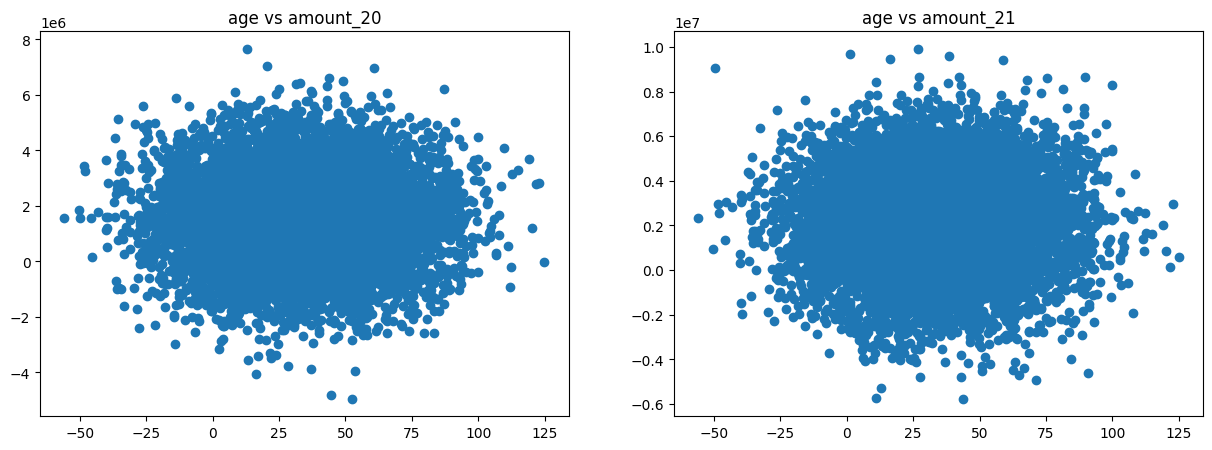

In [ ]:
# 선형관계는 없지만 가운데에 밀집되어 있으므로 나이와 구매금액은 상관관계가 있어 보임
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

x = data['age']
y = data['amount_20']
z = data['amount_21']

# 첫 번째 서브플롯에 산점도 플로팅
axes[0].scatter(x, y)
axes[0].set_title('age vs amount_20')

# 두 번째 서브플롯에 산점도 플로팅
axes[1].scatter(x, z)
axes[1].set_title('age vs amount_21')

plt.show()


In [ ]:
matrix = data[['age','gender','price_20','quantity_20','amount_20']].corr()

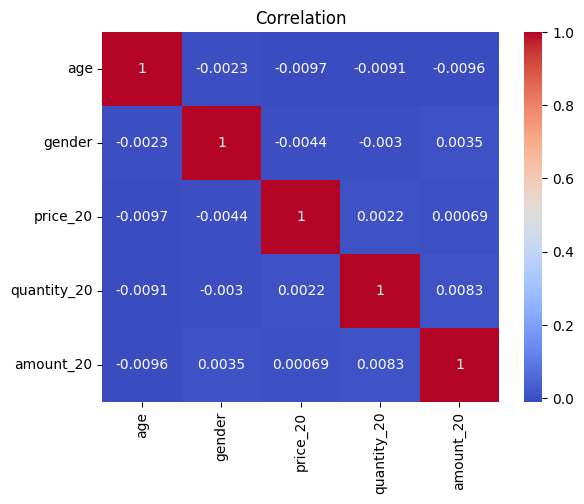

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(matrix, annot=True, cmap = 'coolwarm')
plt.title("Correlation")
plt.show()


In [ ]:
# 가격, 구매 수량에 10개의 결측치 반영
import numpy as np
data.loc[data.sample(10).index, 'price_20'] = np.nan
data.loc[data.sample(10).index, 'price_21'] = np.nan
data.loc[data.sample(10).index, 'quantity_20'] = np.nan
data.loc[data.sample(10).index, 'quantity_21'] = np.nan

- 인사이트를 추가하며 그려본 그래프를 다시 그려봤다

In [ ]:
amount_by_age =data.pivot_table(values=['amount_20', 'amount_21','total'], index='age_cat', aggfunc='mean').round()
amount_by_age=amount_by_age.rename(columns={'amount_20': '20년도 평균', 'amount_21': '21년도 평균', 'total': '전체평균'})
amount_by_age.sort_values(by=list(amount_by_age.columns))

,20년도 평균,21년도 평균,전체평균
age_cat,,,
seventies,994873.0,1269777.0,2513369.0
teenagers,1042997.0,1273108.0,2576854.0
eighties,1054844.0,1207198.0,2525753.0
sixties,1060545.0,1265604.0,2591285.0
twenties,1080726.0,1276513.0,2627421.0
forties,1536247.0,1970540.0,2593900.0
fifties,1579017.0,1917364.0,2594090.0
thirties,1587356.0,1987582.0,2647851.0


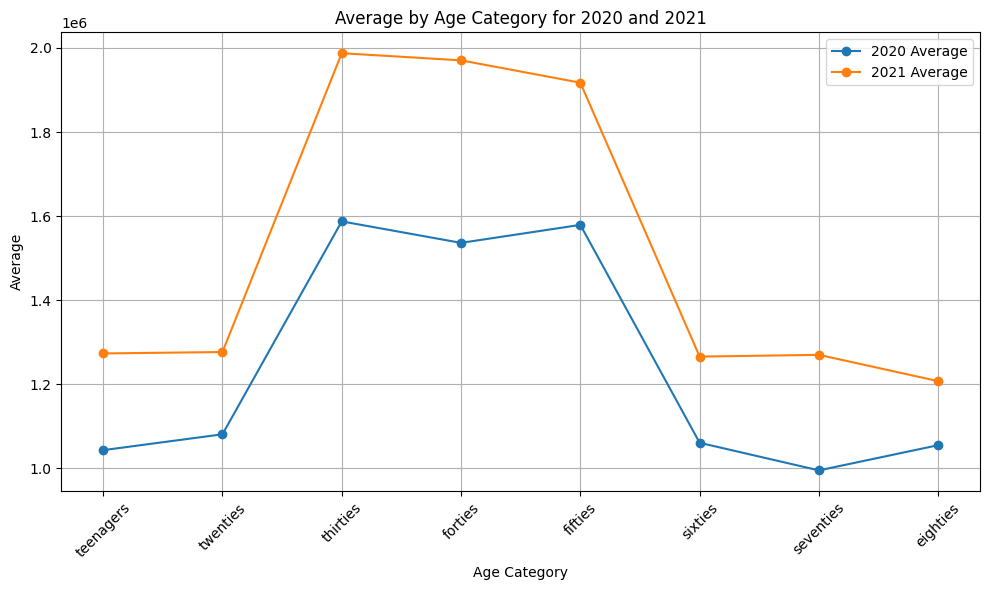

In [ ]:
# 20/21년도 나잇대별로 그래프
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(amount_by_age.index ,amount_by_age['20년도 평균'],marker='o',label='2020 Average')
plt.plot(amount_by_age.index,amount_by_age['21년도 평균'],marker='o',label='2021 Average')

plt.title('Average by Age Category for 2020 and 2021')
plt.xlabel('Age Category')
plt.ylabel('Average')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 보여주기
plt.show()

In [ ]:
pivot_20 = merge_df.pivot_table(index=['product_20','gender'],values='age',aggfunc='mean')
pivot_21 = merge_df.pivot_table(index=['product_21','gender'],values='age',aggfunc='mean')

pivot_21.index.rename(['product_20', 'gender'], inplace=True)

# left_index=True, right_index=True
# 각 피벗 테이블의 인덱스를 기준으로 병합을 수행하도록 설정
combined_pivot = pd.merge(pivot_20, pivot_21, left_index=True, right_index=True)
combined_pivot.index.names = ['product','gender']
combined_pivot.columns=['2020 age average','2021 age average']
print(combined_pivot)

                2020 age average  2021 age average
product gender                                    
10      0              64.991544         64.452170
        1              65.719149         64.872085
20      0              31.859070         32.903916
        1              32.436843         32.968665
30      0              48.778818         49.362728
        1              48.951202         49.722487


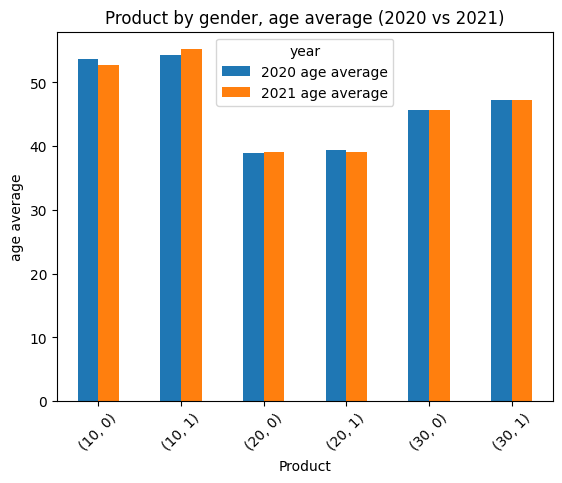

In [ ]:
import matplotlib.pyplot as plt

# 막대 그래프 그리기
combined_pivot.plot(kind='bar')
plt.title('Product by gender, age average (2020 vs 2021)')
plt.xlabel('Product')
plt.ylabel('age average')
plt.xticks(rotation=45)  # x축 레이블 45도 회전
plt.legend(title='year')
plt.show()


In [ ]:
mean_by_day = pd.pivot_table(merge_df, values=['amount_20','amount_21','total'],index=day, aggfunc = 'sum').round()
mean_by_day.sort_values(by=list(mean_by_day.columns))

,amount_20,amount_21,total
Wednesday,1.752387e+09,2.173754e+09,3.616335e+09
Tuesday,1.800401e+09,2.119192e+09,3.571519e+09
Sunday,1.812335e+09,2.341118e+09,3.759374e+09
Monday,1.813559e+09,2.231155e+09,3.684957e+09
Saturday,1.842317e+09,2.307177e+09,3.801885e+09
Thursday,1.853928e+09,2.260169e+09,3.723424e+09
Friday,1.863411e+09,2.272202e+09,3.763685e+09


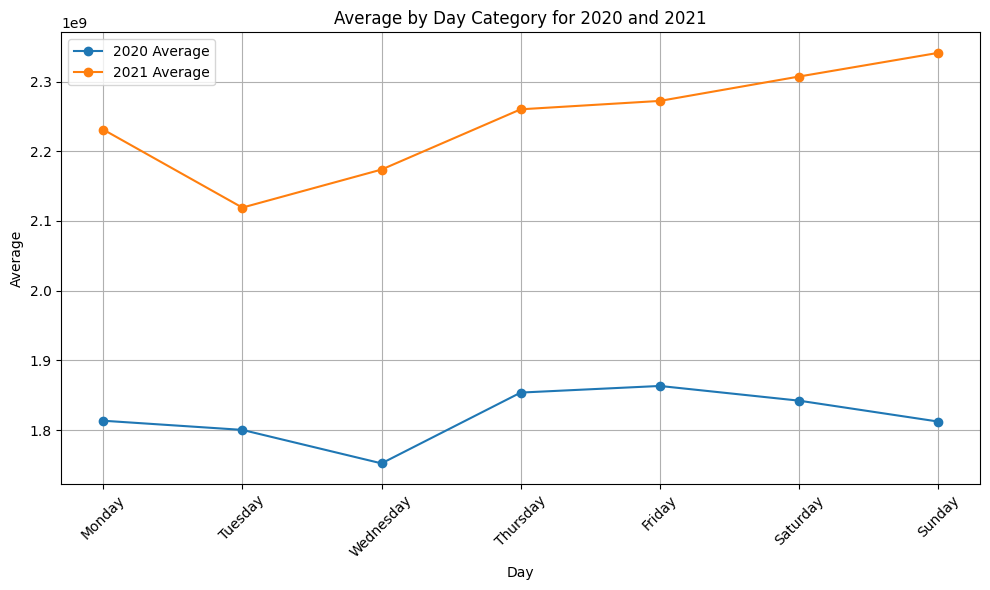

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

day1 = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
mean_by_day = mean_by_day.reindex(day1)

plt.plot(mean_by_day.index,mean_by_day['amount_20'], marker='o',label ='2020 Average')
plt.plot(mean_by_day.index,mean_by_day['amount_21'], marker='o',label ='2021 Average')

plt.title('Average by Day Category for 2020 and 2021')
plt.xlabel('Day')
plt.ylabel('Average')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 보여주기
plt.show()

In [ ]:
age_by_time20 = data.pivot_table(columns='gender',index=['time_cat20'],values='cusno',aggfunc='count').round()
age_by_time20

gender,0,1
time_cat20,,
dawn,1202,1244
morning,1256,1219
afternoon,1241,1317
evening,408,413
night,845,855


In [ ]:
age_by_time21 = data.pivot_table(columns='gender',index=['time_cat21'],values='cusno',aggfunc='count').round()
age_by_time21

gender,0,1
time_cat21,,
dawn,1299,1276
morning,1216,1222
afternoon,1231,1275
evening,425,422
night,781,853


In [ ]:
import pandas as pd

age_by_time21.index.rename= 'time_cat20'
# age_by_time20와 age_by_time21을 병합
combined_age_by_time = pd.merge(age_by_time20, age_by_time21,left_index=True, right_index=True)
combined_age_by_time.index.name = 'time'
combined_age_by_time.columns = ['20 male','20 female','21 male','21 female']
print(combined_age_by_time)


           20 male  20 female  21 male  21 female
time                                             
dawn          1202       1244     1299       1276
morning       1256       1219     1216       1222
afternoon     1241       1317     1231       1275
evening        408        413      425        422
night          845        855      781        853


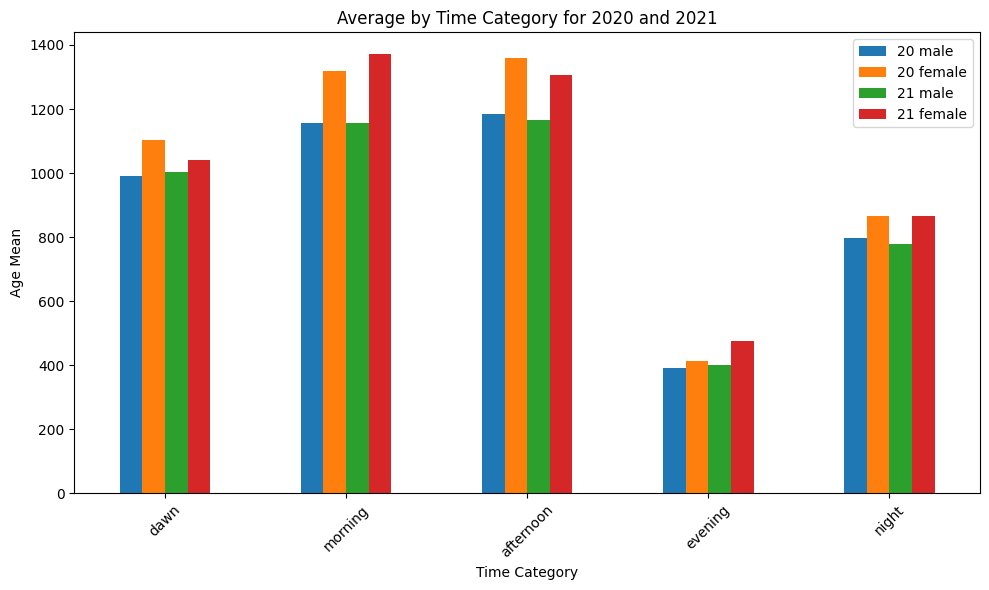

In [ ]:
import matplotlib

combined_age_by_time.plot(kind='bar', figsize=(10, 6))

# 그래프 제목 및 레이블 설정
plt.title('Average by Time Category for 2020 and 2021')
plt.xlabel('Time Category')
plt.ylabel('Age Mean')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 보여주기
plt.show()

In [ ]:
# 간편하게 보기위해서 시간 범주형으로 나이 평균
time_by_age = merge_df.pivot_table(index='time_cat20',values='age',aggfunc='mean')
time_by_age

,age
time_cat20,
dawn,31.063530
morning,45.622542
afternoon,44.357654
evening,46.079126
night,37.733639


In [ ]:
time_by_age1 = merge_df.pivot_table(index ='time_cat21',values = 'age', aggfunc='mean')
time_by_age1

,age
time_cat21,
dawn,31.618704
morning,44.090237
afternoon,45.622266
evening,46.215235
night,37.897905


In [ ]:

time_by_age1.index.rename('time_cat20',inplace=True)
combined_time_by_age = pd.merge(time_by_age,time_by_age1,left_index=True, right_index=True)

combined_time_by_age.index.name = 'time_cat'
combined_time_by_age.columns=['20 age mean','21 age mean']
combined_time_by_age

,20 age mean,21 age mean
time_cat,,
dawn,31.063530,31.618704
morning,45.622542,44.090237
afternoon,44.357654,45.622266
evening,46.079126,46.215235
night,37.733639,37.897905


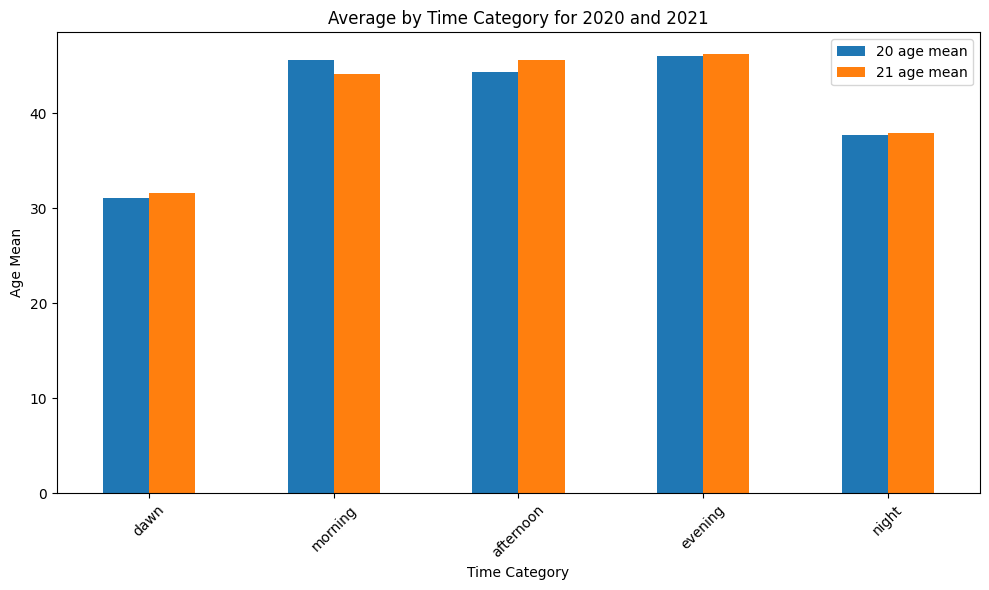

In [ ]:
combined_time_by_age.plot(kind='bar', figsize=(10, 6))

# 그래프 제목 및 레이블 설정
plt.title('Average by Time Category for 2020 and 2021')
plt.xlabel('Time Category')
plt.ylabel('Age Mean')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 보여주기
plt.show()

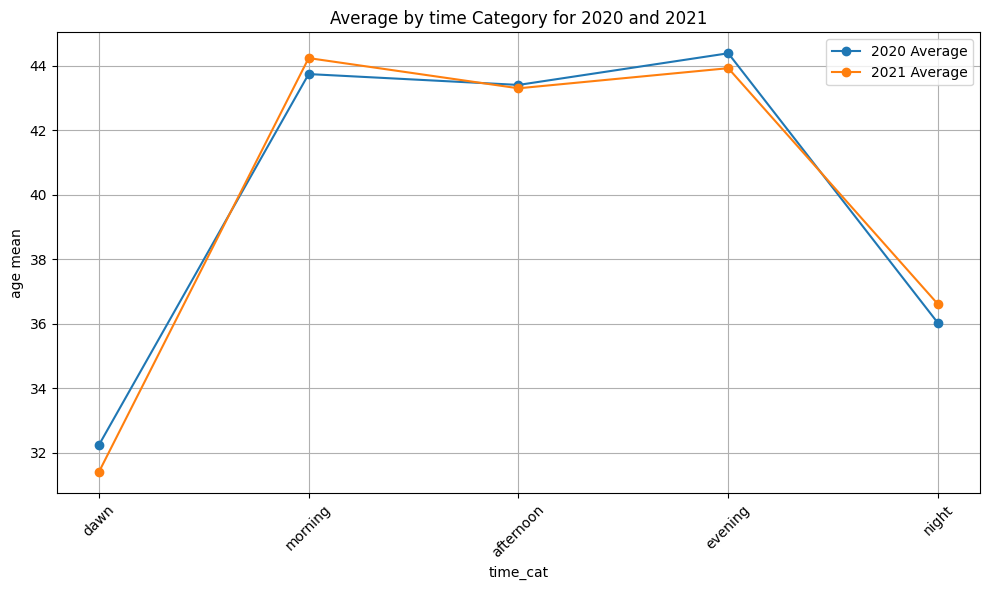

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.plot(combined_time_by_age.index,combined_time_by_age['20 age mean'], marker='o',label ='2020 Average')
plt.plot(combined_time_by_age.index,combined_time_by_age['21 age mean'], marker='o',label ='2021 Average')

plt.title('Average by time Category for 2020 and 2021')
plt.xlabel('time_cat')
plt.ylabel('age mean')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 보여주기
plt.show()

In [ ]:
pi = merge_df.pivot_table(index='year',values=['quantity_20','quantity_21'],aggfunc='sum')
pi

,quantity_20,quantity_21
year,,
2020,126359.0,0
2021,0.0,252603


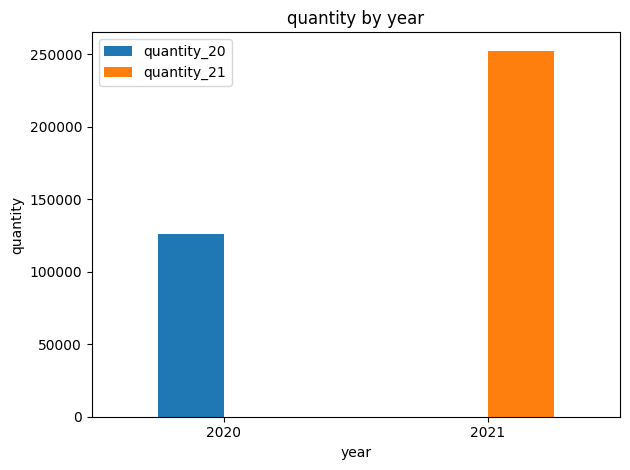

In [ ]:
pi.plot(kind='bar')

plt.title('quantity by year')
plt.xlabel('year')
plt.ylabel('quantity')
plt.legend()
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

#### 과제3.
Q1. data_rev.csv를 불러와서 추가적으로 의미있는 3개의 인사이트를 반영한 후 탐색적 분석을 통하여 그 내용을 통계적 시각적으로 도출하고 인사이트가 반영되었는지 여부를 기술하시고 data_analysis.csv로 저장하세요.

Q2. data_analysis.csv를 기반으로 아래 예시를 참조하여 새로운 분석 과제를 정의한 후 그 과제에 적합한 분석용 데이터셋을 만든 후 과제에 적합한 이유 및 특징을 기술하고 data_obj.csv로 저장하세요.

(예시)고객별 구매감소 원인을 파악하기 위한 분석형 데이터셋을 생성한 후 탐색적 분석을 수행.(거래기준 데이터 -> 고객기준 데이터로 변환)

In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

# 업로드된 파일을 데이터프레임으로 읽기
file_path = list(uploaded.keys())[0]
df = pd.read_csv(file_path,index_col=0)

Saving data_2.csv to data_2.csv


In [2]:
data = df.copy()

In [ ]:
data.isnull().sum()

cusid           0
cusno           0
gender          0
age             0
region          0
date            0
day             0
product_20      0
product_21      0
price_20       10
price_21       10
quantity_20    10
quantity_21    10
time_20         0
time_21         0
amount_20       0
amount_21       0
total           0
age_cat         0
time_cat20      0
time_cat21      0
year            0
month           0
days            0
dtype: int64

In [3]:
# 결측치 처리
data.price_20.fillna(data.price_20.mean(),inplace=True)
data.price_21.fillna(data.price_21.mean(),inplace=True)
data.quantity_20.fillna(data.quantity_20.mean(),inplace=True)
data.quantity_21.fillna(data.quantity_21.mean(),inplace=True)

In [4]:
data.isnull().sum()

cusid          0
cusno          0
gender         0
age            0
region         0
date           0
day            0
product_20     0
product_21     0
price_20       0
price_21       0
quantity_20    0
quantity_21    0
time_20        0
time_21        0
amount_20      0
amount_21      0
total          0
age_cat        0
time_cat20     0
time_cat21     0
year           0
month          0
days           0
dtype: int64

In [ ]:
data

,cusid,cusno,gender,age,region,date,day,product_20,product_21,price_20,...,time_21,amount_20,amount_21,total,age_cat,time_cat21,time_cat20,year,month,days
0,1.0,1.0,0.0,65.800949,9.0,2021-11-30,Tuesday,30.0,30.0,20400.45,...,1.731932,2.163600e+06,1.294042e+06,3.457642e+06,sixties,dawn,night,2021,11,30
1,1.0,1.0,0.0,52.219651,9.0,2020-02-20,Thursday,30.0,30.0,26880.21,...,7.533426,1.144750e+06,2.595819e+06,3.740569e+06,fifties,morning,afternoon,2020,2,20
2,1.0,1.0,0.0,2.402054,9.0,2021-09-11,Saturday,30.0,20.0,18764.62,...,12.020281,1.556972e+06,5.181434e+06,6.738407e+06,childhood,afternoon,dawn,2021,9,11
3,1.0,1.0,0.0,36.272611,9.0,2021-12-19,Sunday,20.0,30.0,3092.66,...,9.924405,1.614097e+06,4.247538e+06,5.861635e+06,thirties,morning,afternoon,2021,12,19
4,1.0,1.0,0.0,50.149470,9.0,2020-12-16,Wednesday,10.0,20.0,17948.80,...,9.300455,2.179819e+06,1.309205e+06,3.489024e+06,fifties,morning,afternoon,2020,12,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1000.0,1000.0,0.0,12.794764,1.0,2020-12-22,Tuesday,30.0,10.0,48659.99,...,8.093043,2.008720e+06,3.237787e+06,5.246507e+06,teenagers,morning,dawn,2020,12,22
9996,1000.0,1000.0,0.0,26.305755,1.0,2020-08-01,Saturday,20.0,10.0,31289.80,...,8.946876,1.845640e+06,1.391025e+06,3.236665e+06,twenties,morning,morning,2020,8,1
9997,1000.0,1000.0,0.0,50.723343,1.0,2021-08-03,Tuesday,20.0,10.0,15851.53,...,18.058970,2.650943e+06,3.558769e+06,6.209712e+06,fifties,evening,afternoon,2021,8,3
9998,1000.0,1000.0,0.0,64.019353,1.0,2020-06-15,Monday,20.0,20.0,44765.18,...,10.094318,2.223264e+06,1.814386e+06,4.037650e+06,sixties,morning,night,2020,6,15


In [ ]:
data.describe()

,cusid,cusno,gender,age,region,product_20,product_21,price_20,price_21,quantity_20,quantity_21,time_20,time_21,amount_20,amount_21,total,year,month,days
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.00000,10000.000000
mean,500.398500,500.398500,0.502600,35.118448,5.559900,20.091000,19.945000,25606.414231,25350.516231,39.435620,51.114114,12.059831,11.980829,1.783973e+06,2.401173e+06,4.185146e+06,2020.501200,6.51030,15.654000
std,289.188527,289.188527,0.500018,20.625324,2.908412,8.152813,8.129796,14194.180949,14167.728894,23.349636,28.751258,5.676180,5.767530,1.216556e+06,1.652625e+06,2.049547e+06,0.500024,3.43783,8.811972
min,1.000000,1.000000,0.000000,0.007579,1.000000,10.000000,10.000000,1000.900000,1000.470000,0.008367,1.000000,0.010462,0.008810,1.052013e+02,1.081031e+02,3.438896e+04,2020.000000,1.00000,1.000000
25%,249.000000,249.000000,0.000000,18.709704,3.000000,10.000000,10.000000,13375.775000,13003.367500,20.839631,26.000000,7.995454,7.766672,8.068052e+05,1.043321e+06,2.669413e+06,2020.000000,4.00000,8.000000
50%,503.000000,503.000000,1.000000,34.168008,6.000000,20.000000,20.000000,25880.800000,25500.180000,37.920823,51.000000,12.562443,12.465752,1.608101e+06,2.156412e+06,3.986195e+06,2021.000000,7.00000,16.000000
75%,751.000000,751.000000,1.000000,49.693551,8.000000,30.000000,30.000000,37784.470000,37418.020000,55.480958,76.000000,16.198895,16.193099,2.562364e+06,3.470281e+06,5.507210e+06,2021.000000,9.00000,23.000000
max,1000.000000,1000.000000,1.000000,89.914966,10.000000,30.000000,30.000000,49996.260000,49991.950000,129.331293,100.000000,23.999115,23.999685,7.700481e+06,9.988362e+06,1.284004e+07,2021.000000,12.00000,31.000000


In [5]:
# insight 1 : 연령대별 어느 시간대에 많이 구매했는지
# 연령대별 선호하는 시간대를 파악해 이벤트 시간 조정
age_by_time = data.pivot_table(index='age_cat', columns='time_cat20', values='cusid', aggfunc='count', fill_value=0)
age_by_time

time_cat20,afternoon,dawn,evening,morning,night
age_cat,,,,,
childhood,0,1280,0,0,0
eighties,190,0,0,0,0
fifties,463,0,675,2,0
forties,1460,0,0,10,0
seventies,150,0,0,0,224
sixties,0,0,82,0,674
teenagers,0,286,0,1134,0
thirties,1409,8,0,366,0
twenties,0,108,0,1479,0


In [6]:
age_by_time1 = data.pivot_table(index='age_cat',columns='time_cat21',values='cusid',aggfunc='count', fill_value=0)
age_by_time1

time_cat21,afternoon,dawn,evening,morning,night
age_cat,,,,,
childhood,465,227,84,383,121
eighties,65,42,10,63,10
fifties,411,190,79,343,117
forties,528,251,104,440,147
seventies,132,57,34,117,34
sixties,257,133,53,243,70
teenagers,542,244,103,403,128
thirties,651,305,134,518,175
twenties,574,279,115,479,140


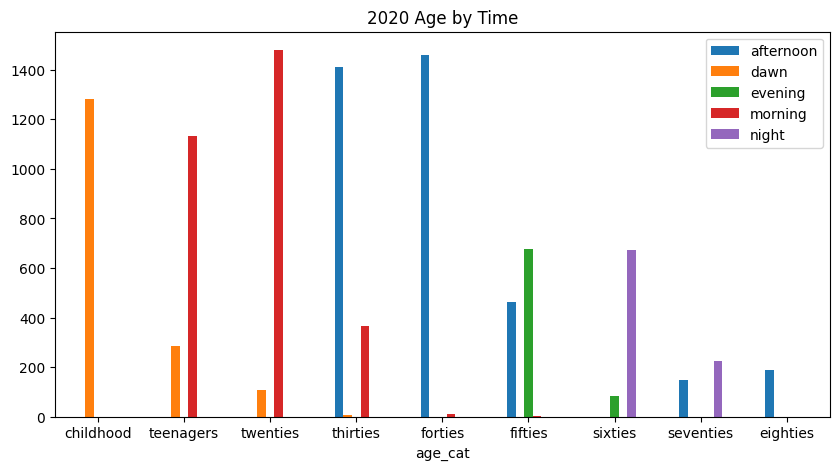

In [7]:
import matplotlib.pyplot as plt


age_order = ['childhood', 'teenagers', 'twenties', 'thirties', 'forties', 'fifties', 'sixties', 'seventies', 'eighties']
age_by_time = age_by_time.reindex(age_order)

age_by_time.plot(kind ='bar',figsize=(10,5))
plt.title('2020 Age by Time')
plt.xticks(rotation=0)
plt.legend()
plt.show()

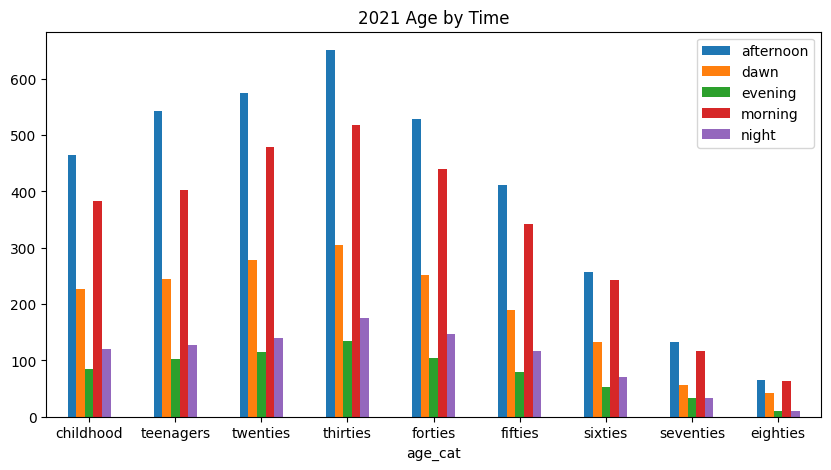

In [8]:
import matplotlib.pyplot as plt

age_order = ['childhood', 'teenagers', 'twenties', 'thirties', 'forties', 'fifties', 'sixties', 'seventies', 'eighties']
age_by_time1 = age_by_time1.reindex(age_order)


age_by_time1.plot(kind ='bar',figsize=(10,5))
plt.title('2021 Age by Time')
plt.xticks(rotation=0)
plt.legend()
plt.show()

In [9]:
# 간편하게 보기위해서 시간 범주형으로 나이 평균
time_by_age = data.pivot_table(index='time_cat20',values='age',aggfunc='mean')
time_by_age

,age
time_cat20,
afternoon,45.763564
dawn,7.865765
evening,57.145213
morning,22.267600
night,66.869863


In [10]:
time_by_age1 = data.pivot_table(index ='time_cat21',values = 'age', aggfunc='mean')
time_by_age1

,age
time_cat21,
afternoon,34.633166
dawn,35.119995
evening,35.544586
morning,35.623945
night,35.055205


In [11]:

time_by_age1.index.rename('time_cat20',inplace=True)
combined_time_by_age = pd.merge(time_by_age,time_by_age1,left_index=True, right_index=True)

combined_time_by_age.index.name = 'time_cat'
combined_time_by_age.columns=['20 age mean','21 age mean']
combined_time_by_age

,20 age mean,21 age mean
time_cat,,
afternoon,45.763564,34.633166
dawn,7.865765,35.119995
evening,57.145213,35.544586
morning,22.267600,35.623945
night,66.869863,35.055205


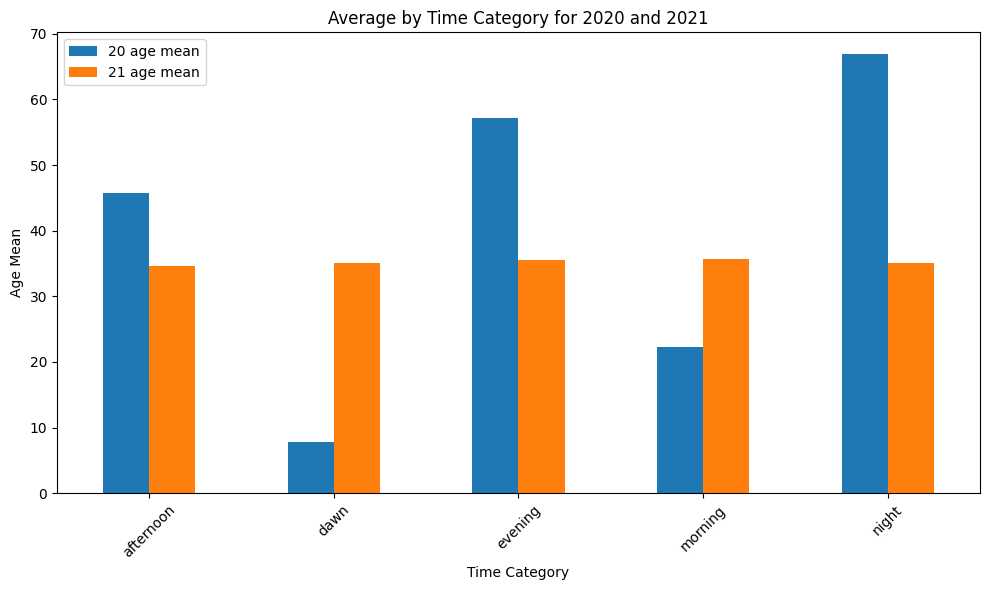

In [12]:
combined_time_by_age.plot(kind='bar', figsize=(10, 6))

# 그래프 제목 및 레이블 설정
plt.title('Average by Time Category for 2020 and 2021')
plt.xlabel('Time Category')
plt.ylabel('Age Mean')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 보여주기
plt.show()

In [ ]:
# 원하는 인사이트를 위한 수정
# (20년도) 새벽에 나이 평균이 너무 낮고 밤에는 나이 평균이 너무 높다
# 새벽나이대의 평균을 올리고, 밤에 나이 평균을 낮추기

In [13]:
def age_time(x):
    if x['age'] <10:
        return x['time_20'] * 4
    elif 60 < x['age'] <= 80:
        return x['time_20'] * 0.5
    elif 10 < x['age'] <=30:
        return x['time_20'] * 1.8
    else:
        return x['time_20']

data['time_20'] = data.apply(lambda x: age_time(x), axis = 1)

In [14]:
# 시간별 시간 범주 업데이트
bins = [1, 6, 12, 18, 20, 24]
labels = ['dawn', 'morning', 'afternoon', 'evening', 'night']

# 1을 제외한 나머지 구간의 왼쪽 경계를 조정하여 24를 포함시킴
adjusted_bins = [0] + bins[1:]

data['time_cat20'] = pd.cut(data['time_20'], bins=adjusted_bins, labels=labels)

In [ ]:
data.groupby('age_cat').time_20.mean()

age_cat
childhood    14.797988
eighties     12.694423
fifties      18.291165
forties      15.543445
seventies     9.496348
sixties      10.505832
teenagers    11.190333
thirties     12.701650
twenties     17.338940
Name: time_20, dtype: float64

In [15]:
# 변경된 연령대별 시간 평균
data.groupby('age_cat').time_20.mean()
# 의도한 바대로 20년도의 10대 이하들의 구매한 시간 평균을 올랐으며,
# 60~70대의 구매한 시간 평균은 줄어들었다

age_cat
childhood    14.797988
eighties     12.694423
fifties      18.291165
forties      15.543445
seventies     9.496348
sixties      10.505832
teenagers    11.190333
thirties     12.701650
twenties     17.338940
Name: time_20, dtype: float64

In [16]:

age_by_time = data.pivot_table(index='age_cat',columns='time_cat20',values='cusid',aggfunc='count')
age_by_time

time_cat20,dawn,morning,afternoon,evening,night
age_cat,,,,,
childhood,144,262,395,158,321
eighties,0,0,190,0,0
fifties,0,2,463,675,0
forties,0,10,1460,0,0
seventies,0,374,0,0,0
sixties,0,756,0,0,0
teenagers,258,257,905,0,0
thirties,8,366,1409,0,0
twenties,45,63,692,607,180


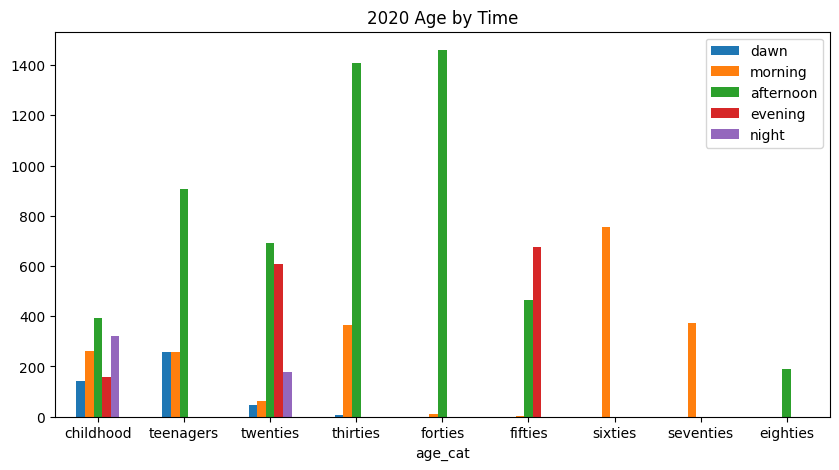

In [17]:
# 변경된 사항을 포함하여 다시 그린 그래프
import matplotlib.pyplot as plt

age_order = ['childhood', 'teenagers', 'twenties', 'thirties', 'forties', 'fifties', 'sixties', 'seventies', 'eighties']
age_by_time = age_by_time.reindex(age_order)

age_by_time.plot(kind ='bar',figsize=(10,5))
plt.title('2020 Age by Time')
plt.xticks(rotation=0)
plt.legend()
plt.show()


In [18]:
# insight 2 : 작년에 비해 가격이 떨어진 상품
# 상품가치 파악
pro_price = data.pivot_table(index='product_20',values=['price_20']).round(2)
pro_price = pro_price.rename_axis('product')
pro_price

,price_20
product,
10,25971.42
20,25728.82
30,25129.44


In [19]:
pro_price1 = data.pivot_table(index='product_21',values=['price_21']).round(2)
pro_price1 = pro_price1.rename_axis('product')
pro_price1

,price_21
product,
10,25053.15
20,25409.04
30,25592.32


In [20]:
product_price = pd.merge(pro_price,pro_price1,left_index=True, right_index=True)
product_price

,price_20,price_21
product,,
10,25971.42,25053.15
20,25728.82,25409.04
30,25129.44,25592.32


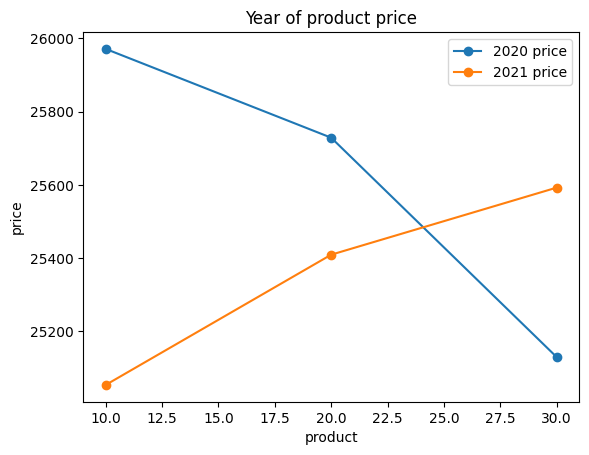

In [21]:
plt.plot(product_price.index,product_price['price_20'], marker ='o',label='2020 price')
plt.plot(product_price.index,product_price['price_21'],marker='o',label='2021 price')
plt.title('Year of product price')
plt.xlabel('product')
plt.ylabel('price')
plt.legend()
plt.show()

In [ ]:
# 20년도는 코로나가 시작한 년도라 저가 상품인 30의 가격이 낮고 10의 가격이 높은 반면
# 21년도는 20년도 보다 상황이 나아져 그 반대로 수정하려고 했으나
# 이미 그래프가 반영되어 있다

In [22]:
# insight 3 : 시간대별 가장 많이 팔리는 상품(고가,중가,저가)
# 시간별 상품의 배치
product_by_time = data.pivot_table(index='time_cat20',columns='product_20',values='cusid',aggfunc = 'count')
product_by_time.columns = ['p10','p20','p30']
product_by_time

,p10,p20,p30
time_cat20,,,
dawn,156,138,161
morning,711,686,693
afternoon,1757,1869,1888
evening,496,469,475
night,158,191,152


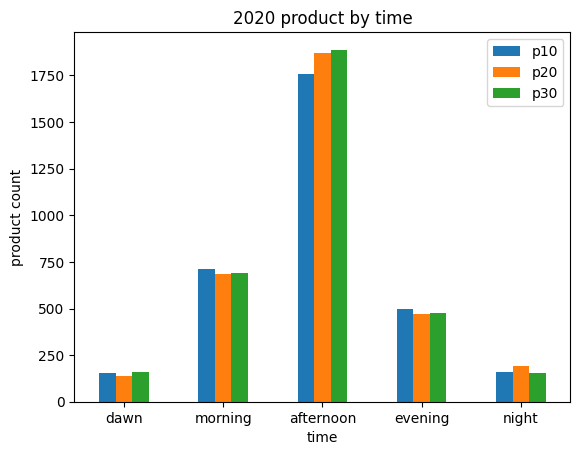

In [23]:
product_by_time.plot(kind='bar')
plt.title('2020 product by time')
plt.xlabel('time')
plt.ylabel('product count')
plt.xticks(rotation=0)
plt.show()

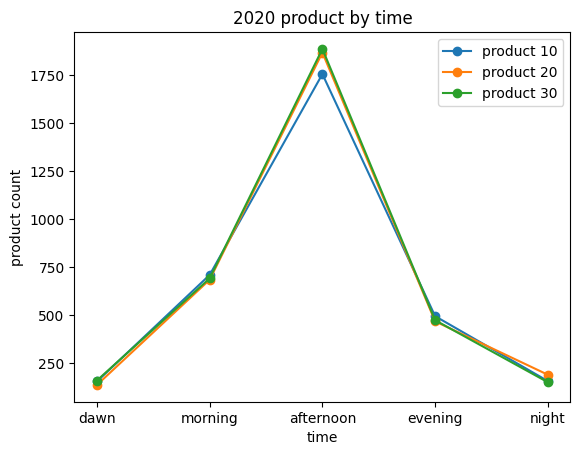

In [24]:
plt.plot(product_by_time.index, product_by_time['p10'],marker ='o',label='product 10')
plt.plot(product_by_time.index, product_by_time['p20'],marker ='o', label = 'product 20')
plt.plot(product_by_time.index, product_by_time['p30'],marker ='o',label = 'product 30')
plt.title('2020 product by time')
plt.xlabel('time')
plt.ylabel('product count')
plt.legend()
plt.show()
# 2020년도에는 모든 제품이 오후에 많이 팔리는 걸 볼 수 있다

In [25]:
product_by_time1 = data.pivot_table(index='time_cat21',columns='product_21',values='cusid',aggfunc = 'count')
product_by_time1.columns =['p10','p20','p30']
product_by_time1

,p10,p20,p30
time_cat21,,,
afternoon,1212,1253,1160
dawn,578,593,557
evening,236,233,247
morning,990,1002,997
night,316,310,316


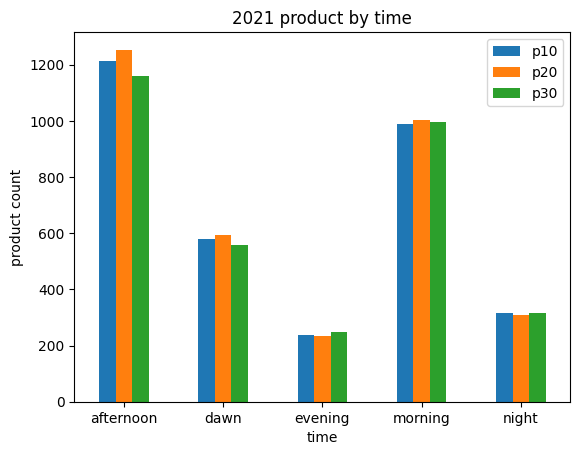

In [26]:
product_by_time1.plot(kind='bar')
plt.title('2021 product by time')
plt.xlabel('time')
plt.ylabel('product count')
plt.xticks(rotation=0)
plt.show()

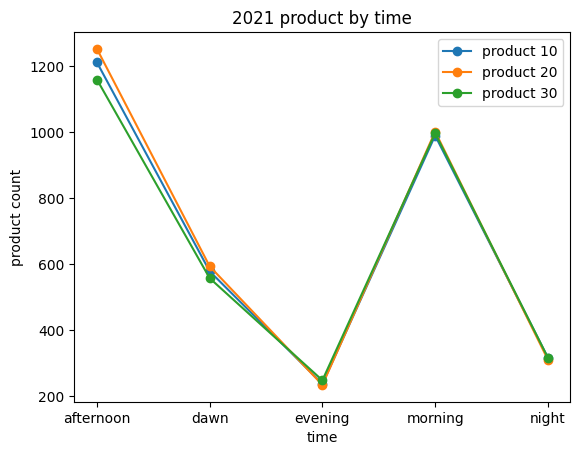

In [27]:
plt.plot(product_by_time1.index, product_by_time1['p10'],marker ='o',label='product 10')
plt.plot(product_by_time1.index, product_by_time1['p20'],marker ='o', label = 'product 20')
plt.plot(product_by_time1.index, product_by_time1['p30'],marker ='o',label = 'product 30')
plt.title('2021 product by time')
plt.xlabel('time')
plt.ylabel('product count')
plt.legend()
plt.show()
# 2021년도에도 모든 제품이 오후에 많이 팔리는 걸 볼 수 있다

In [36]:
# 2020년도에는 코로나로 인해 활동량이 없으므로 모든 시간대 구매율이 비슷하게 수정
def product_time(x):
        if x['time_cat20'] == 'afternoon':
            return x['time_20'] * 1.2
        else:
            return x['time_20']
data['time_20'] = data.apply(lambda x: product_time(x) if x['year'] == 2020 else x['time_20'], axis = 1)

In [37]:
# 시간별 시간 범주 업데이트
bins = [1, 6, 12, 18, 20, 24]
labels = ['dawn', 'morning', 'afternoon', 'evening', 'night']

# 1을 제외한 나머지 구간의 왼쪽 경계를 조정하여 24를 포함시킴
adjusted_bins = [0] + bins[1:]

data['time_cat20'] = pd.cut(data['time_20'], bins=adjusted_bins, labels=labels)

In [38]:
product_by_time = data.pivot_table(index='time_cat20',columns='product_20',values='cusid',aggfunc = 'count')
product_by_time.columns = ['p10','p20','p30']
product_by_time

,p10,p20,p30
time_cat20,,,
dawn,156,138,161
morning,711,686,693
afternoon,953,1009,1018
evening,967,970,999
night,491,550,498


In [29]:
data[['time_cat20','time_20']]

,time_cat20,time_20
0,morning,10.828681
1,afternoon,17.406036
2,morning,7.246951
3,afternoon,12.414168
4,afternoon,16.758012
...,...,...
9995,night,20.259784
9996,afternoon,16.729674
9997,afternoon,16.937650
9998,morning,10.549836


In [34]:
data[['time_cat20','time_20']]

,time_cat20,time_20
0,morning,10.828681
1,afternoon,17.406036
2,morning,7.246951
3,afternoon,12.414168
4,night,20.109615
...,...,...
9995,night,20.259784
9996,afternoon,16.729674
9997,afternoon,16.937650
9998,morning,10.549836


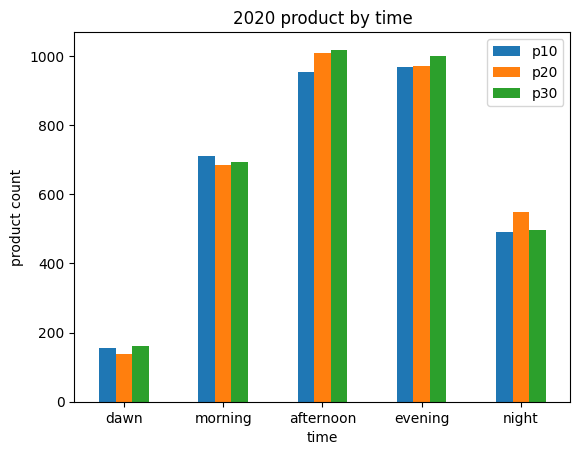

In [39]:
product_by_time.plot(kind='bar')
plt.title('2020 product by time')
plt.xlabel('time')
plt.ylabel('product count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# 지역별 구매 그래프 그려보기(인사이트 추가)
# 마지막 인사이트 수정하는 부분 왜 안되는지 원인 파악

In [47]:
# 지역별 많이 구매하는 월
data.groupby('region').month.count().sort_values(ascending=False)

region
6     1162
10    1121
1     1052
5     1034
8     1022
2     1010
9      961
3      899
7      899
4      840
Name: month, dtype: int64

In [48]:
# 지역별 구매금액
data.groupby('region').amount_20.sum().sort_values(ascending=False)

region
6     2.058288e+09
10    1.996734e+09
5     1.891987e+09
8     1.863106e+09
2     1.834647e+09
1     1.825263e+09
9     1.699473e+09
3     1.616184e+09
7     1.595370e+09
4     1.458683e+09
Name: amount_20, dtype: float64

In [49]:
data.groupby('region').amount_21.sum().sort_values(ascending=False)

region
6     2.850469e+09
10    2.779149e+09
5     2.461072e+09
1     2.420993e+09
2     2.380331e+09
8     2.352260e+09
9     2.304379e+09
7     2.221746e+09
3     2.144574e+09
4     2.096756e+09
Name: amount_21, dtype: float64

In [55]:
# 지역별 가장 잘 팔리는 상품
region_count = data.pivot_table(index='product_20',columns='region',values='cusid',aggfunc='count')
region_count

region,1,2,3,4,5,6,7,8,9,10
product_20,,,,,,,,,,
10,360,315,291,266,338,402,294,356,297,359
20,330,344,312,293,340,376,300,327,341,390
30,362,351,296,281,356,384,305,339,323,372


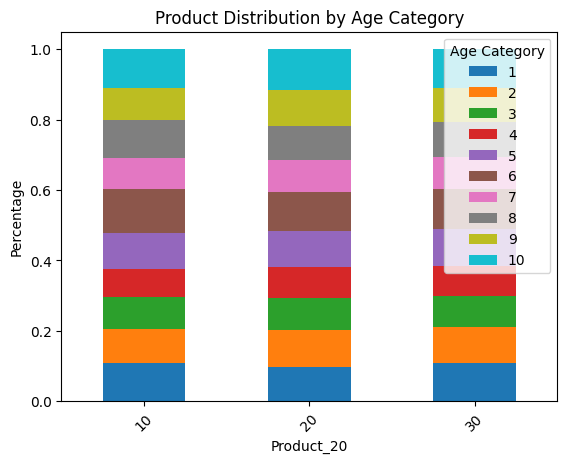

In [56]:
df_percentage = region_count.div(region_count.sum(axis=1), axis=0)

# 누적 막대 그래프 그리기
df_percentage.plot(kind='bar', stacked=True)

plt.title('Product Distribution by Age Category')
plt.xlabel('Product_20')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Age Category')
plt.show()

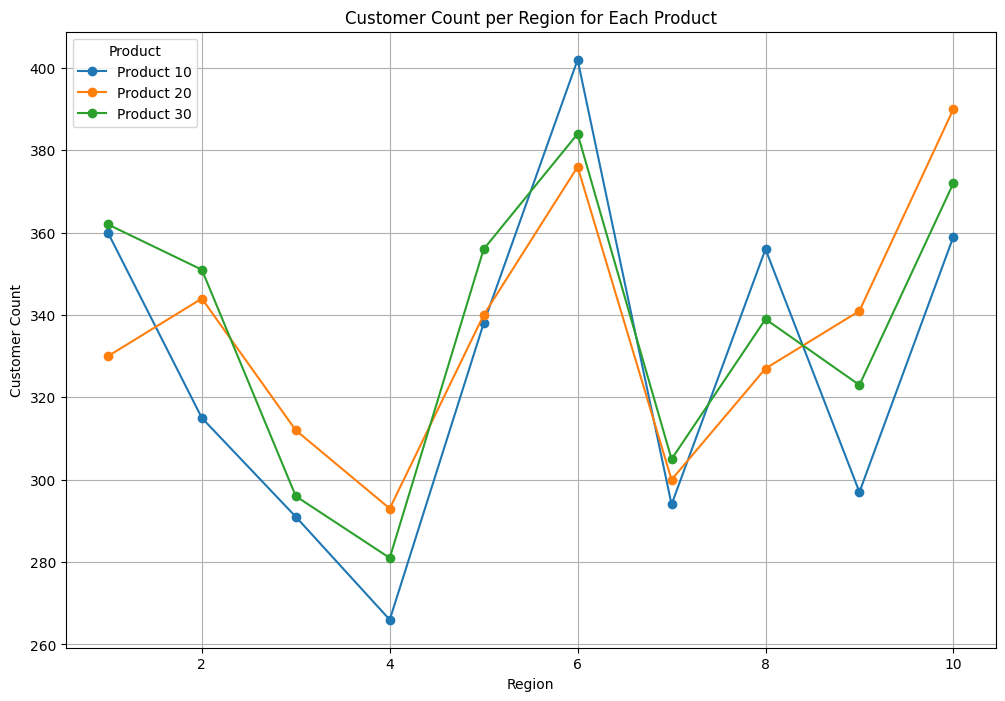

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

for product in region_count.index:
    plt.plot(region_count.columns, region_count.loc[product], marker='o', label=f'Product {product}')
plt.title('Customer Count per Region for Each Product')
plt.xlabel('Region')
plt.ylabel('Customer Count')
plt.legend(title='Product')
plt.grid(True)
plt.show()

In [64]:
# 연령대별 어느 상품을 많이 구매했는지
# 20년도와 21년도 비교하여 어느 상품이 구매율이 떨어지고 올랐는지 원인 파악을 위해

pro20_age = data.pivot_table(index='age_cat',columns='product_20',values='cusid',aggfunc='count')
pro20_age

product_20,10,20,30
age_cat,,,
childhood,427,429,424
eighties,57,63,70
fifties,380,366,394
forties,458,504,508
seventies,128,135,111
sixties,251,251,254
teenagers,502,453,465
thirties,569,619,595
twenties,506,533,548


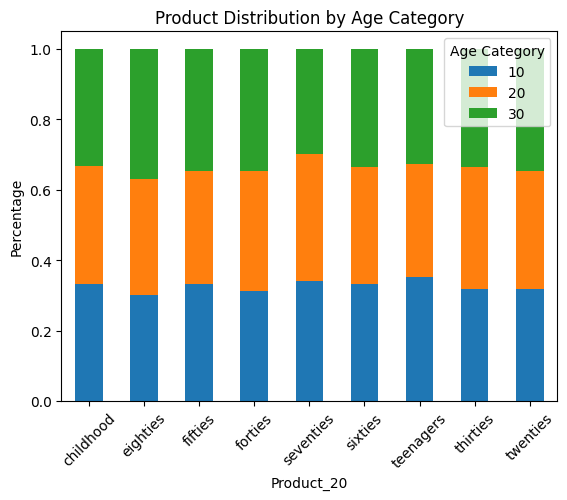

In [ ]:
df_percentage = pro20_age.div(pro20_age.sum(axis=1), axis=0)

# 누적 막대 그래프 그리기
df_percentage.plot(kind='bar', stacked=True)

plt.title('Product Distribution by Age Category')
plt.xlabel('Product_20')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Age Category')
plt.show()

In [65]:
pro21_age-pro20_age

product_21,10,20,30
age_cat,,,
childhood,-20,24,-4
eighties,-12,11,1
fifties,9,-2,-7
forties,61,8,-69
seventies,0,-6,6
sixties,8,-24,16
teenagers,-46,24,22
thirties,53,-32,-21
twenties,1,35,-36


In [63]:
pro21_age = data.pivot_table(index='age_cat',columns='product_21',values='cusid',aggfunc='count')
pro21_age

product_21,10,20,30
age_cat,,,
childhood,407,453,420
eighties,45,74,71
fifties,389,364,387
forties,519,512,439
seventies,128,129,117
sixties,259,227,270
teenagers,456,477,487
thirties,622,587,574
twenties,507,568,512


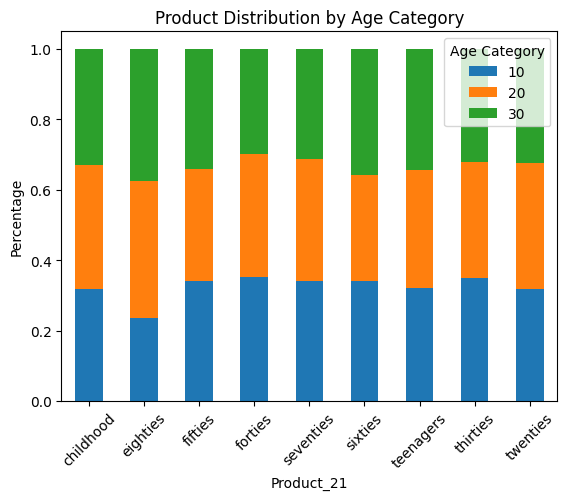

In [ ]:
df_percentage = pro21_age.div(pro21_age.sum(axis=1), axis=0)

# 누적 막대 그래프 그리기
df_percentage.plot(kind='bar', stacked=True)

plt.title('Product Distribution by Age Category')
plt.xlabel('Product_21')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Age Category')
plt.show()

In [ ]:
# 작년에비해 구매율이 줄어든 상품 (연령별)

In [ ]:
data.to_csv('data_analysis.csv')